In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold, KFold
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

#### Q.2.3 Construct a decision tree and display the structure of this tree using a graphic.

In [2]:
Titanic_df = pd.read_csv('titanic3.csv')

		DECISION TREE STRUCTURE


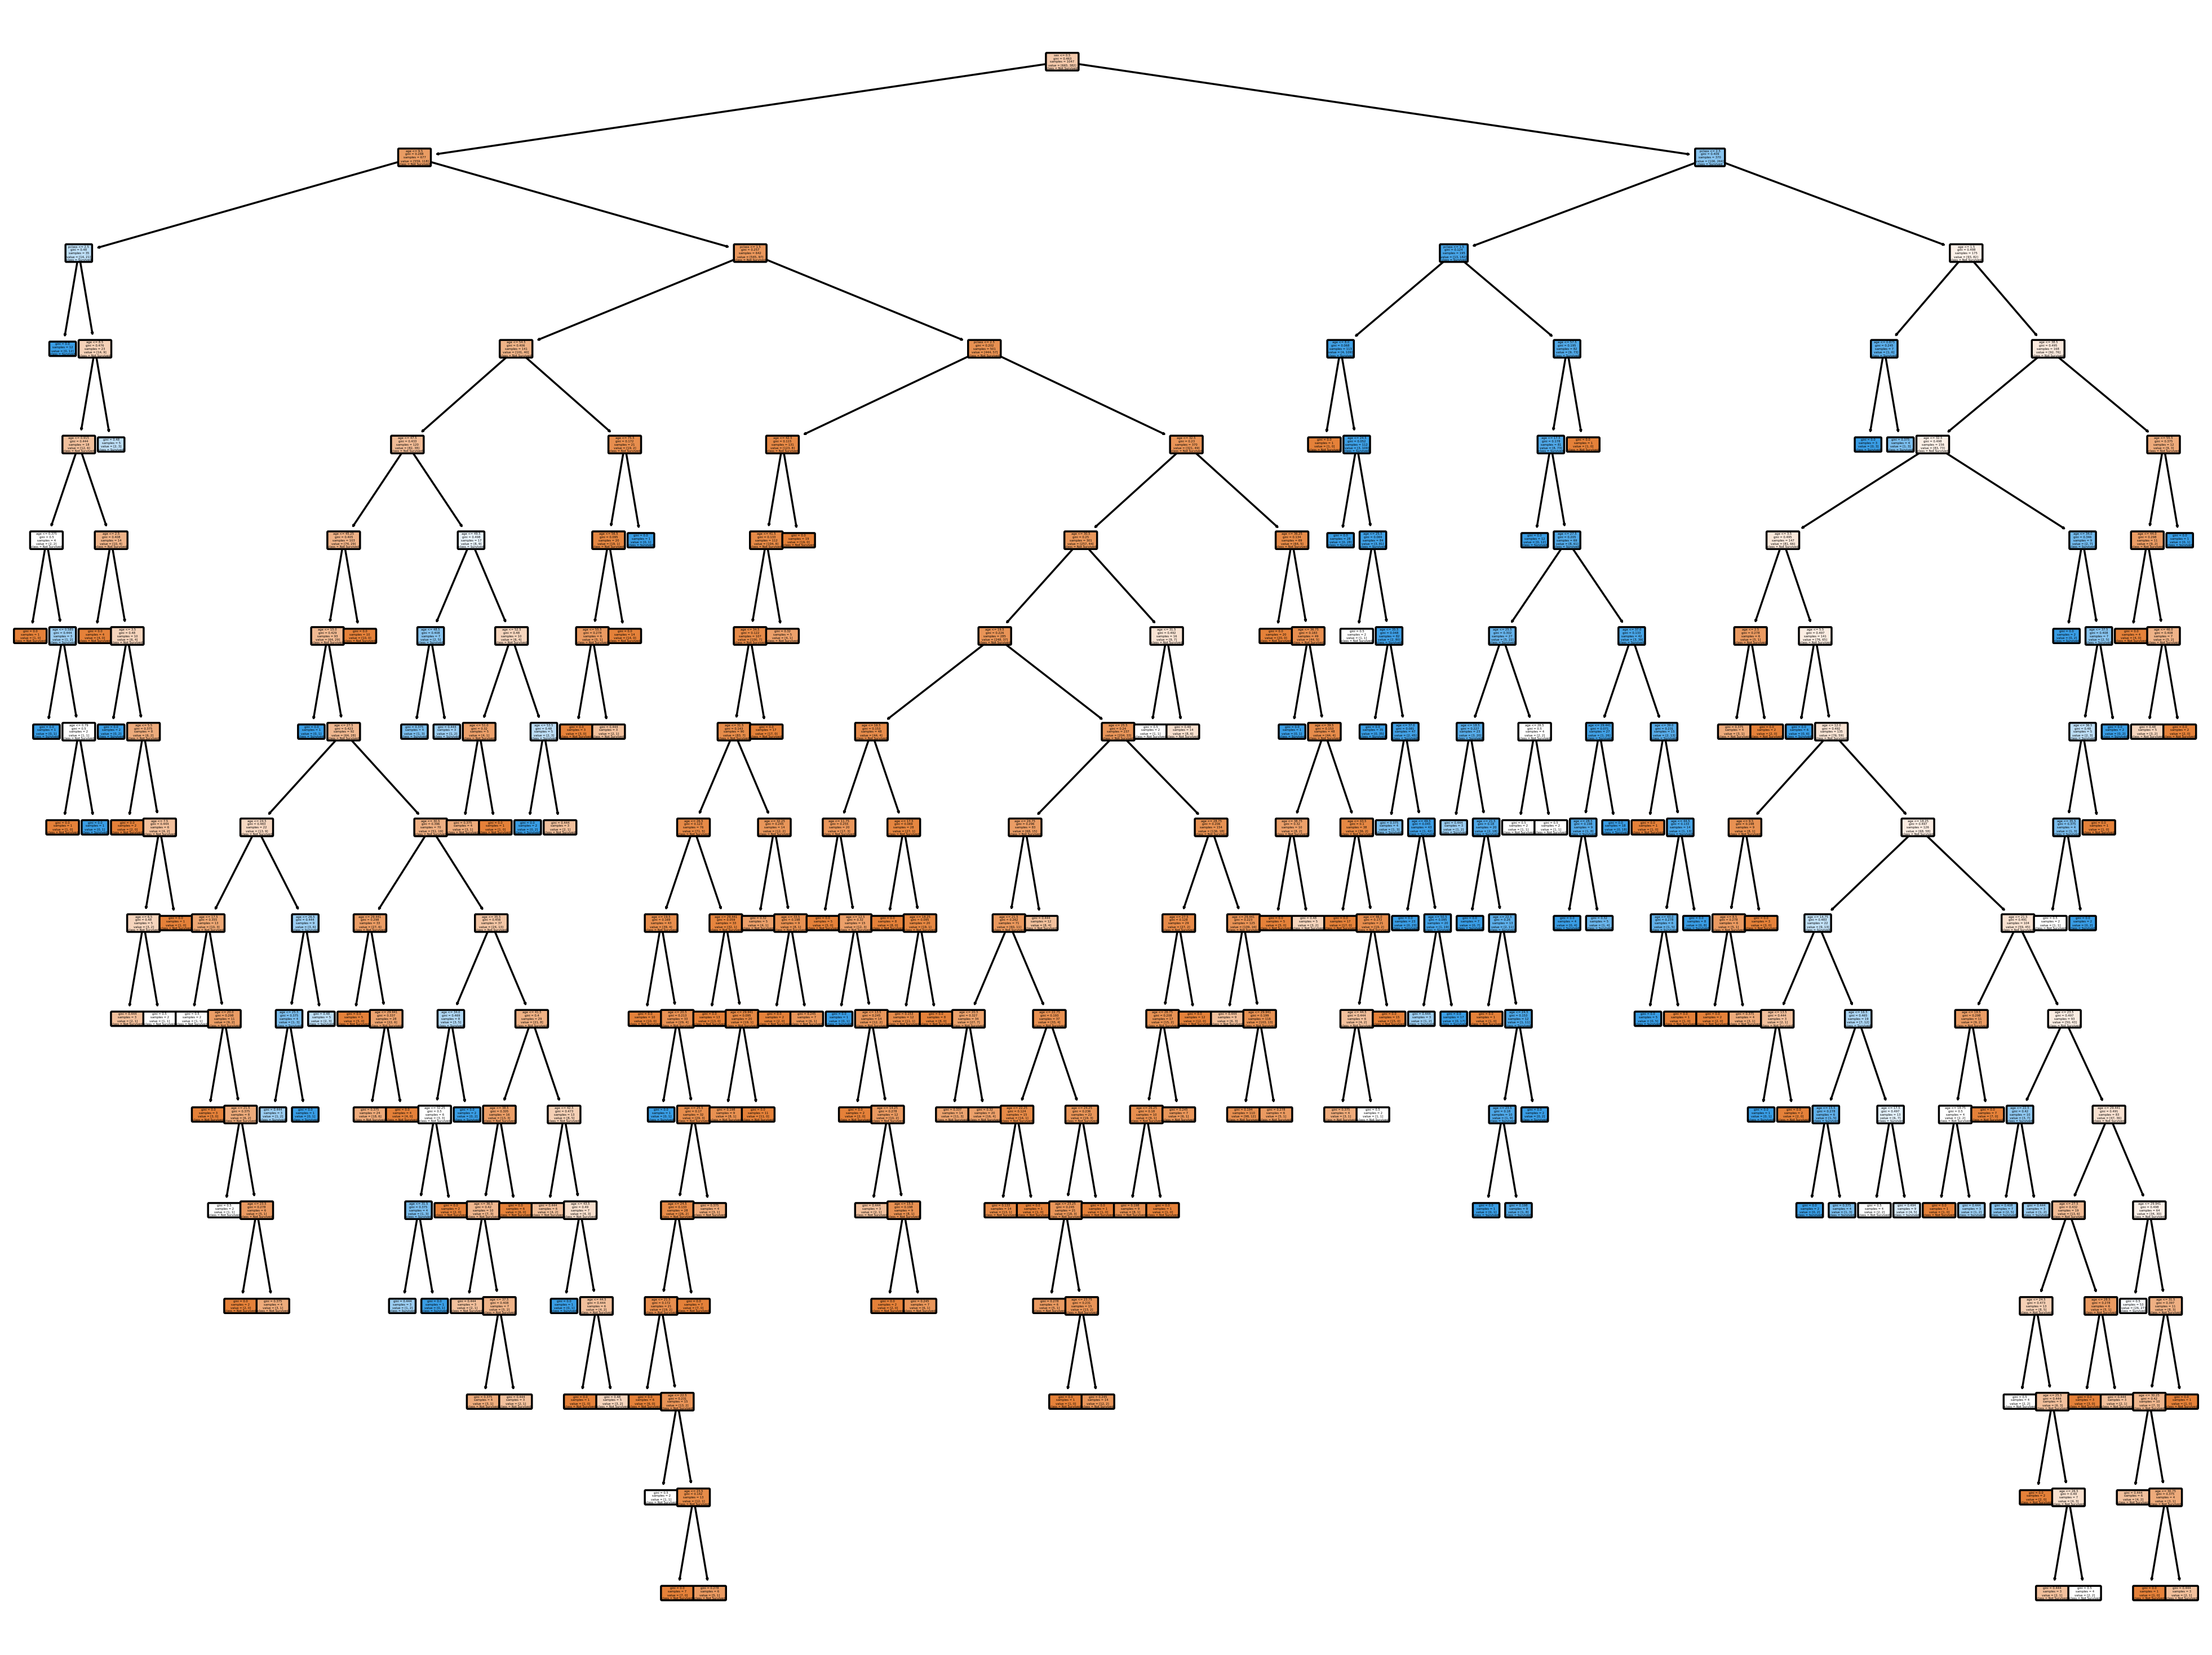

In [3]:
"""Plotting decision tree`for titanic dataset with necessary columns (age, sex, pclass and survived)"""

titanic_df = Titanic_df[['age', 'sex', 'pclass', 'survived']]
titanic_df['age'].fillna(titanic_df['age'].mean(), inplace=True)
titanic_df.isnull().sum()
titanic_df['sex'] = titanic_df['sex'].map({'male': 0, 'female': 1})

X = titanic_df.drop('survived', axis=1)       # Selecting independent variables
y = titanic_df['survived']                    # Selecting dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the data into training and testing sets


clf = DecisionTreeClassifier(random_state=42)         # Fit the model
clf.fit(X_train, y_train)
# Plotting the decision tree

print('\t\tDECISION TREE STRUCTURE')
plt.figure(figsize=(20, 15), dpi=250)
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'], rounded=True)
plt.show()

#### Q2.4.  Evaluate the performance of the tree (before and after pruning) and provide results using cross-validation.

Cross Validation Performance Before running

---------------------------------------------
Cross validation Accuracy:[0.50763359 0.75954198 0.67557252 0.66412214 0.63601533]

Mean accuracy before pruning: 0.6485771109356263

Misclassification error before pruning:0.2595419847328244

Cross Validation Performance After Prunning

---------------------------------------------
Cross validation Accuracy Score: [0.51526718 0.80152672 0.79770992 0.67938931 0.60536398]

Mean accuracy after pruning: 0.6798514228890644

Misclassification error after pruning:, 0.27099236641221375

Pruning increased the accuracy of the model!!

			DECISION TREE AFTER PRUNNING


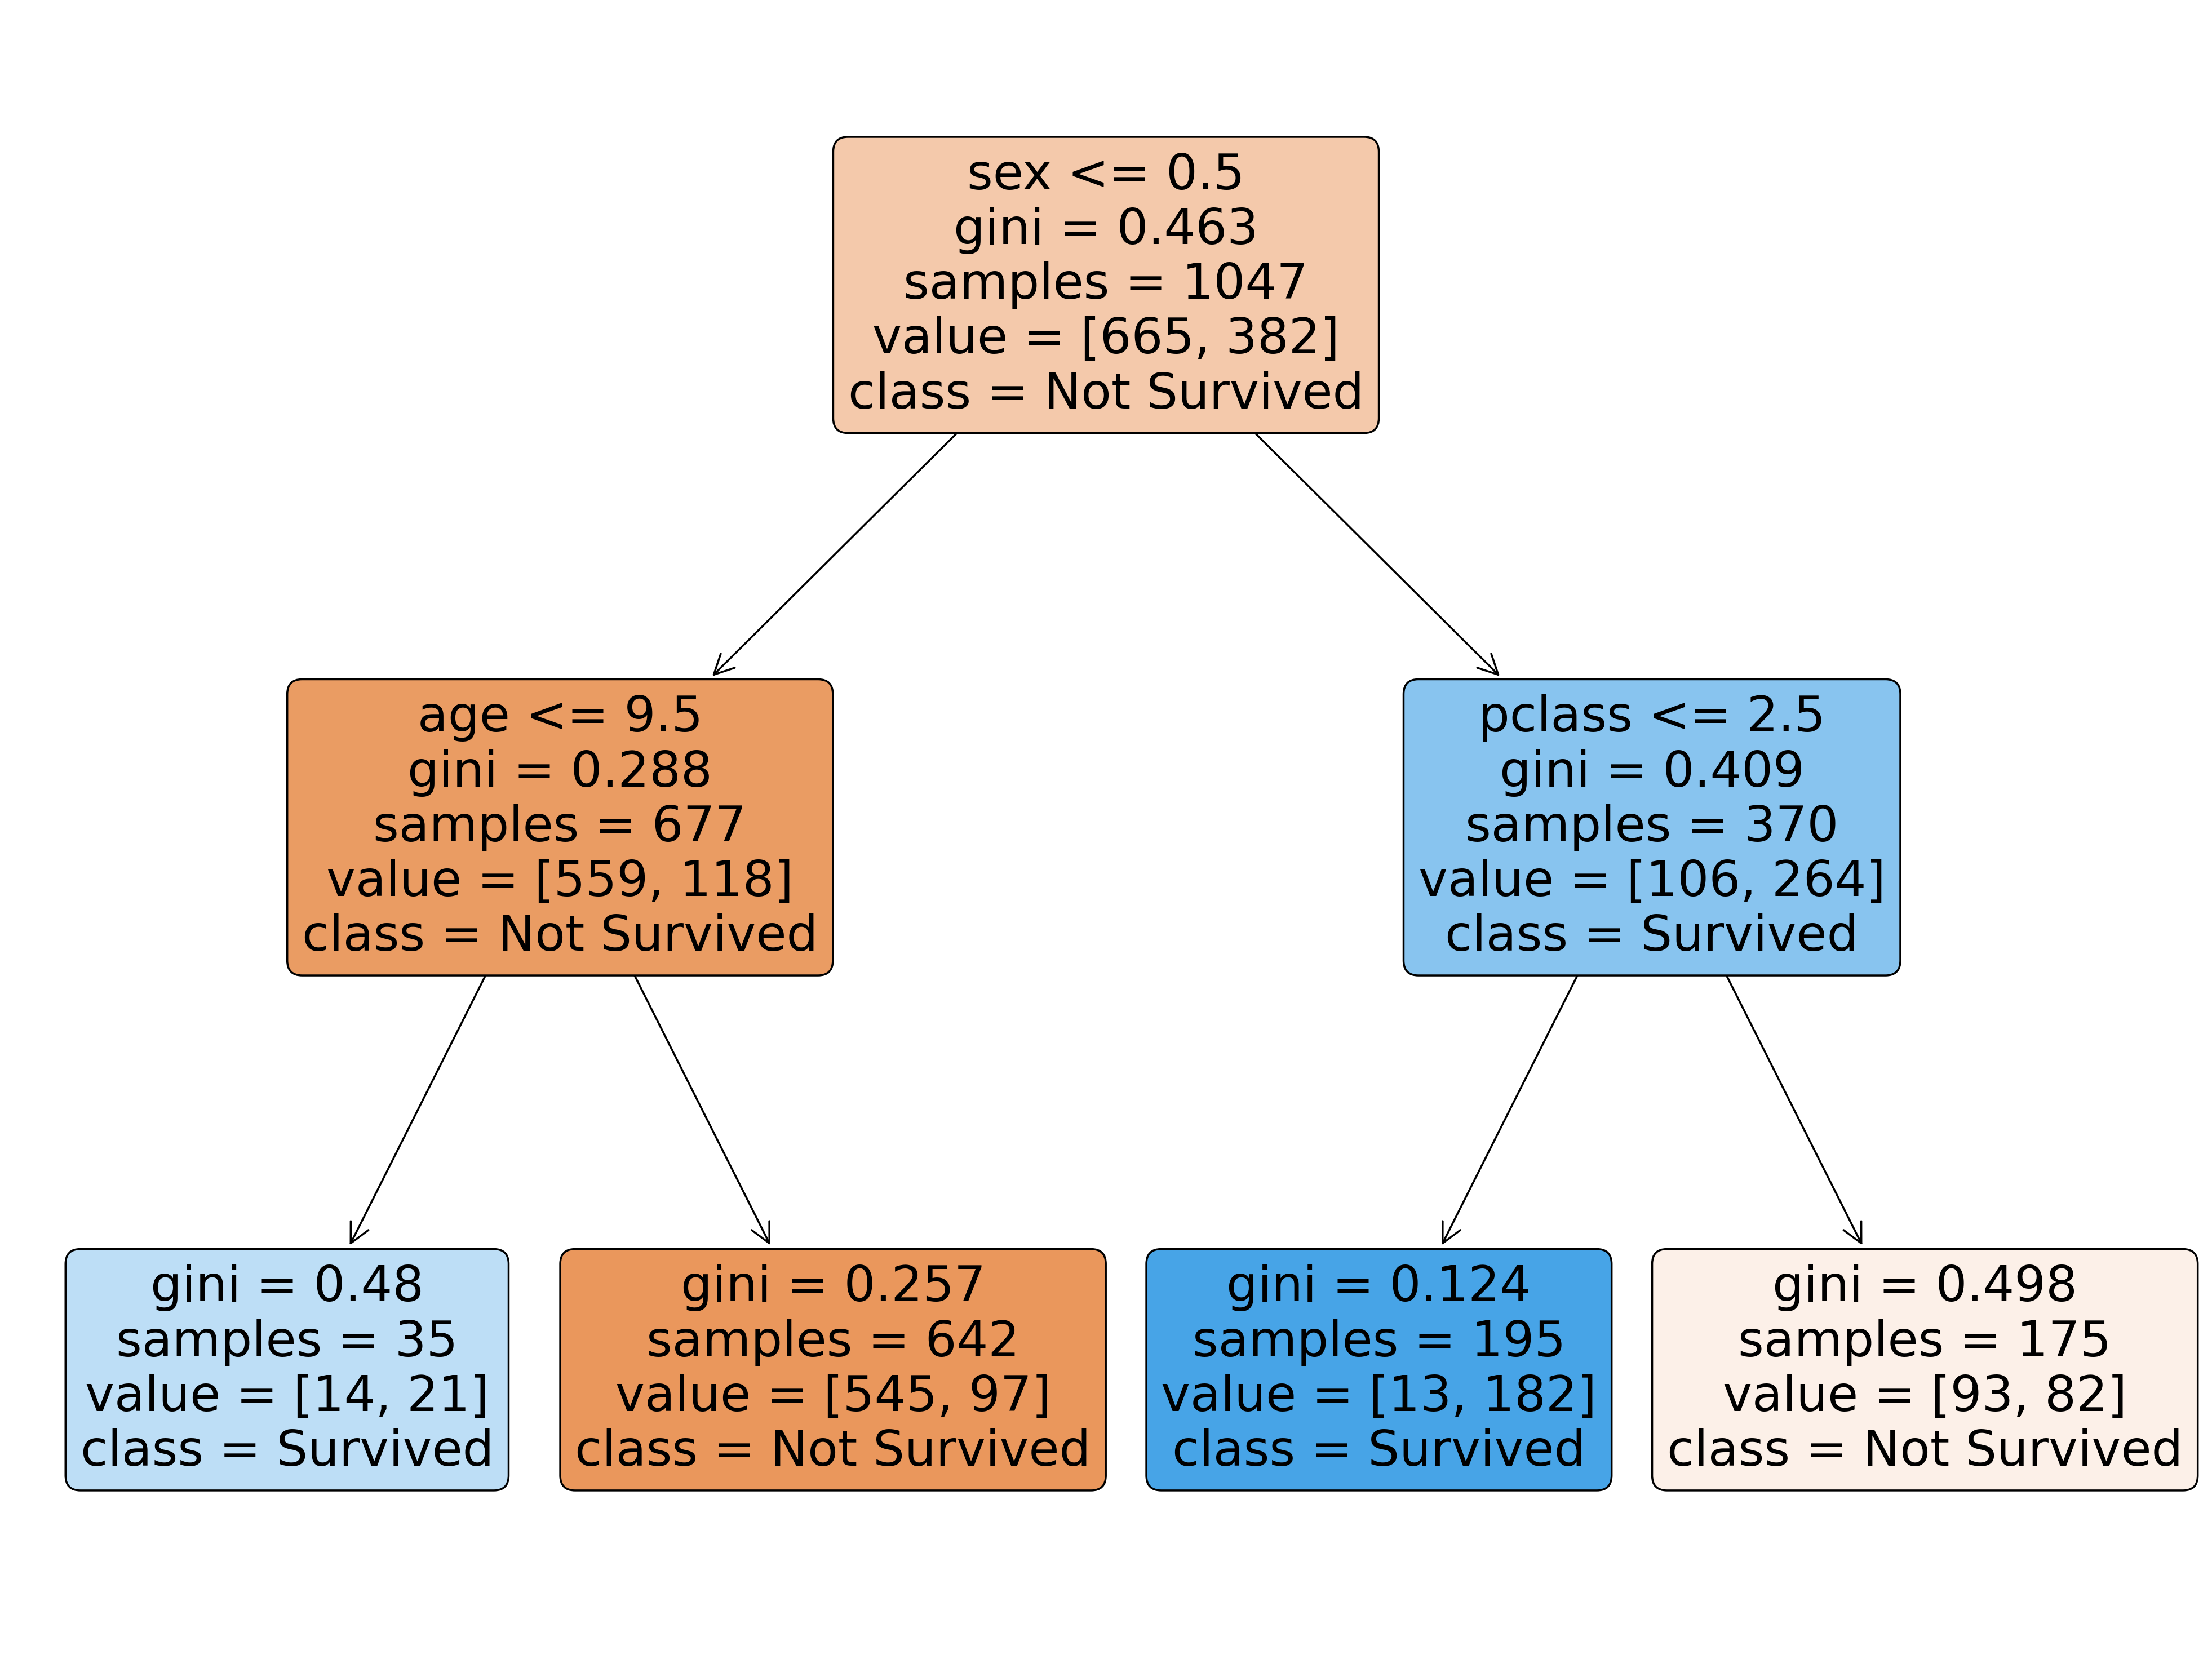

In [4]:
"""Evaluation of the performance before pruning and after prunning."""
before_prun = DecisionTreeClassifier(random_state=42)
bprun_score = cross_val_score(before_prun, X, y, cv=5, scoring='accuracy')
before_prun.fit(X_train, y_train)
y_pred_before = before_prun.predict(X_test)
conf_matrix_before = confusion_matrix(y_test, y_pred_before)
ME_before_pruning = (conf_matrix_before[0, 1] + conf_matrix_before[1, 0]) / len(y_test)

# Evaluate performance after pruning
after_prun = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)  # ccp_alpha is the complexity parameter for pruning
after_prun.fit(X_train, y_train)
Aprun_score = cross_val_score(after_prun, X, y, cv=5, scoring='accuracy')

# Evaluate performance after pruning
y_pred_after = after_prun.predict(X_test)
conf_matrix_after = confusion_matrix(y_test, y_pred_after)
ME_after_pruning = (conf_matrix_after[0, 1] + conf_matrix_after[1, 0]) / len(y_test)


# Print cross-validation scores before pruning
print('Cross Validation Performance Before running\n')
print('-'*45)
print(f'Cross validation Accuracy:{bprun_score}\n')
print(f'Mean accuracy before pruning: {bprun_score.mean()}\n')
#ME_before_pruning = 1 - bprun_score.mean()
print(f'Misclassification error before pruning:{ME_before_pruning}\n')

# Print cross-validation scores after pruning
print('Cross Validation Performance After Prunning\n')
print('-'*45)
print(f'Cross validation Accuracy Score: {Aprun_score}\n')
print(f'Mean accuracy after pruning: {Aprun_score.mean()}\n')
#ME_after_pruning = 1 - Aprun_score.mean()
print(f'Misclassification error after pruning:, {ME_after_pruning}\n')
# Compare CV before and after pruning 
if Aprun_score.mean() > bprun_score.mean():
    print('Pruning increased the accuracy of the model!!')
else:
    print("Accuracy of the model reduced.")


# Plot the decision tree after pruning
print('\n\t\t\tDECISION TREE AFTER PRUNNING')
plt.figure(figsize=(20, 15), dpi=250)
plot_tree(after_prun, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'], rounded=True)
plt.show()


#### Q2.4 5. Compare the final tree with logistic regression

In [5]:
"""Build logistic regression model using cross-validation to compare with the Decision Tree performance"""
log_reg = LogisticRegression(random_state=42)
log_reg_scores = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')

log_reg.fit(X_train, y_train)     # Fit the logistic regression model


y_pred_log_reg = log_reg.predict(X_test)            # Evaluate logistic regression performance
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
misclassification_error_log_reg = (conf_matrix_log_reg[0, 1] + conf_matrix_log_reg[1, 0]) / len(y_test)

#Logistic Regression Performance                
print(f'Cross-validation scores: {log_reg_scores}\n')
print(f'Mean accuracy: {log_reg_scores.mean()}\n')
print(f'Logistc Regression Misclassification error: {misclassification_error_log_reg}\n')
print(f'Misclassification error after pruning Decision tree:, {ME_after_pruning}\n')
# Compare logistic regression and decision tree after pruning
if misclassification_error_log_reg < ME_after_pruning:
    print('Logistic regression has better performance compare to pruned decision tree considering  error.')
else:
    print('The pruned decision tree has has better performance compare to logistic regression Considering error')


Cross-validation scores: [0.52290076 0.82442748 0.80152672 0.70610687 0.65900383]

Mean accuracy: 0.7027931326957386

Logistc Regression Misclassification error: 0.22519083969465647

Misclassification error after pruning Decision tree:, 0.27099236641221375

Logistic regression has better performance compare to pruned decision tree considering  error.


#### Q.3.2)  construct a KNN classifier

In [6]:
Titanic_df= pd.read_csv('titanic3.csv')

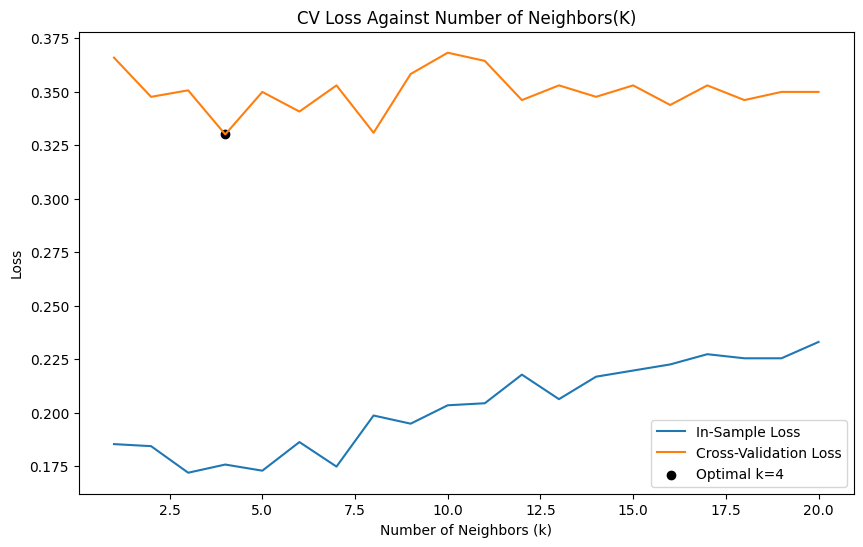

The optimal number of neighbors is: 4


In [7]:
Indep_X = Titanic_df.drop(['survived', 'name', 'ticket', 'cabin', 'embarked', 'boat', 'body', 'home.dest','sibsp','parch','fare'], axis=1)
dep_y = Titanic_df['survived']
Indep_X['sex'] = Indep_X['sex'].map({'male': 0, 'female': 1}) # Encoding Sex column into binary
Indep_X['age'].fillna(Indep_X['age'].mean(), inplace=True)     # Handling missing value with mean
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Indep_X, dep_y, test_size=0.2, random_state=42)

# Fit the KNN classifier with default parameters
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)

# Evaluate the performance with resubloss (in-sample loss)
resubloss = 1 - knn_default.score(X_train, y_train)

# Evaluate the performance with cross-validation
cross_val_loss = 1 - cross_val_score(knn_default, Indep_X, dep_y, cv=5).mean()

# Fine-tuning the classifier - num_neighbours
k_values = list(range(1, 21))
in_sample_losses = []
CV_loss = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    in_sample_loss = 1 - knn.score(X_train, y_train)
    cross_val_loss = 1 - cross_val_score(knn, Indep_X, dep_y, cv=5).mean()
    
    in_sample_losses.append(in_sample_loss)
    CV_loss.append(cross_val_loss)

# Identify the optimal number of neighbors using cross-validation
optimal_k = k_values[CV_loss.index(min(CV_loss))]

# Plot the graph of loss against the number of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, in_sample_losses, label='In-Sample Loss')
plt.plot(k_values, CV_loss, label='Cross-Validation Loss')
plt.scatter(optimal_k, min(CV_loss), color='k', label=f'Optimal k={optimal_k}')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Loss')
plt.title('CV Loss Against Number of Neighbors(K)')
plt.legend()
plt.show()

print(f'The optimal number of neighbors is: {optimal_k}')

#### Q 3.4 Evaluate the performance of the KNN classifier using different distance metrics

In [8]:
"""Evaluating the performance of the KNN classifier using different distance metrics and return their accuracy"""

metric_list = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'hamming']     #

# Dictionary to store performance results
Accuracy = {}

# Loop through different distance metrics
for metric in metric_list:
    # Task: Fit the KNN classifier with a specific distance metric
    knn = KNeighborsClassifier(metric=metric)
    knn.fit(X_train, y_train)

    # Evaluate performance
    accuracy = knn.score(X_test, y_test)
    Accuracy[metric] = accuracy

# Display performance results

print('The performance distance Metric for KNN classifier\n')
for metric, accuracy in Accuracy.items():
    print(f'The performance Accuracy of {metric} distance Metric: {accuracy}')

The performance distance Metric for KNN classifier

The performance Accuracy of euclidean distance Metric: 0.7442748091603053
The performance Accuracy of manhattan distance Metric: 0.7480916030534351
The performance Accuracy of chebyshev distance Metric: 0.683206106870229
The performance Accuracy of minkowski distance Metric: 0.7442748091603053
The performance Accuracy of hamming distance Metric: 0.7519083969465649


#### Q3.5  Compare best KNN with Logistic regression

In [9]:
""" Calculate performance of both classifier using cross-validation by Fit KNN wit optimal k and Fit Logistic Regression"""
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

# Fit Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
# Cross-Validation Accuracy for KNN
knn_cv_accuracy = np.mean(cross_val_score(knn_optimal, X_train, y_train, cv=5, scoring='accuracy'))

# Cross-Validation Accuracy for Logistic Regression
logreg_cv_accuracy = np.mean(cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy'))

# Display cross-validation results
print(f"Cross-Validation Accuracy for KNN with optimal k ({optimal_k}): {knn_cv_accuracy}")
print(f"Cross-Validation Accuracy for Logistic Regression: {logreg_cv_accuracy}")


Cross-Validation Accuracy for KNN with optimal k (4): 0.7688539530644795
Cross-Validation Accuracy for Logistic Regression: 0.7898382319434951


#### Q.4 Regression – wine quality

In [10]:
red_df = pd.read_csv('winequality-red.csv', delimiter = ';')
white_df = pd.read_csv('winequality-white.csv', delimiter = ';')

#### 4.1 Calculate the average of each feature for the red and white wines separately and make a comparison using a bar graph showing the two wines together.

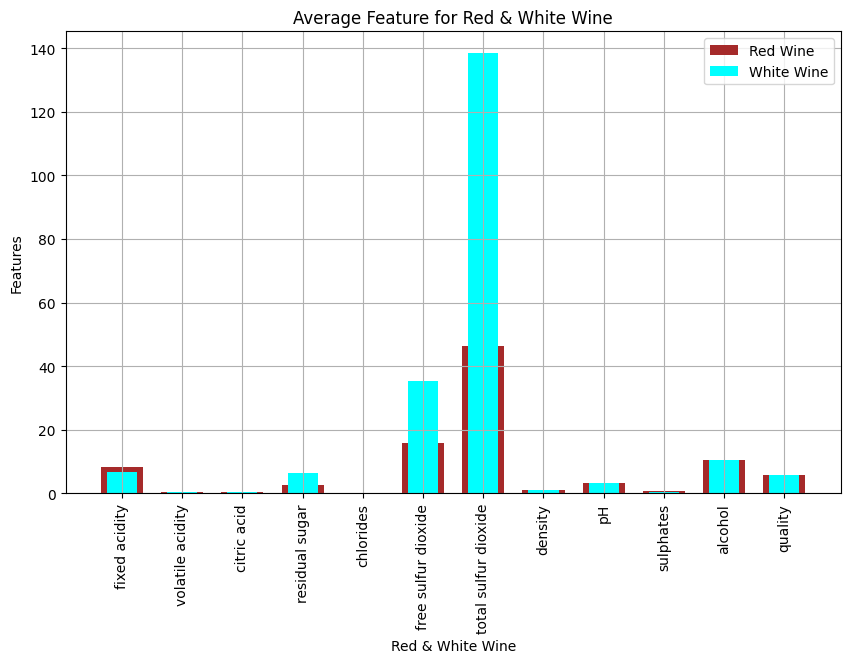

In [11]:
#Calculating the mean of each dataset and plot the graph to compare them
red_df_mean = red_df.mean()
white_df_mean = white_df.mean()
Features = red_df_mean.index.tolist()
red_df_mean = list(red_df_mean)
white_df_mean = list(white_df_mean)

# Plotting bar graph
plt.figure(figsize = (10,6))
plt.bar(Features, red_df_mean, color = 'brown', width = 0.7, label = 'Red Wine')
plt.bar(Features, white_df_mean, color = 'cyan', width = 0.5, label = 'White Wine' )
plt.title('Average Feature for Red & White Wine')
plt.xlabel('Red & White Wine')
plt.ylabel('Features')
plt.legend()
plt.grid()
plt.xticks(rotation = 90)
plt.show()

#### 4.2  Correlation between each feature and the dependent variable using a separate analysis for white and red wine?

In [12]:
Red_indep = red_df.iloc[:, :-1]  #   Extract independent Red wine features columns
Red_dep = red_df.iloc[:, -1]      #  Extracting red wine dependent variable column

White_indep = white_df.iloc[:, :-1]  # Extract independent White wine features columns
White_dep = white_df.iloc[:, -1]      # Extracting White wine dependent variable column


Red_corr = Red_indep.corrwith(Red_dep)     # Calculating the correlation for red wine 
White_corr = White_indep.corrwith(White_dep) # Calculate correlations for white wine
Red_corr = Red_indep.corr()
White_corr = White_indep.corr()

# Extracting correlation with dependent variable for red and white wine
red_corr = Red_corr.iloc[:, -1]      # Extracting the last column (correlation with dependent variable) for red wine
white_corr = White_corr.iloc[:, -1]  # Extracting the last column (correlation with dependent variable) for white wine
red_rank = red_corr.sort_values(ascending=False)

# Rank correlations for white wine
white_rank = white_corr.sort_values(ascending=False)
# Displaying correlation values
print("Correlation Between Red Wine Features Dependent Variable:")
display(red_rank)

print("The Correlation between White Wine Features Dependent Variable:")
print(white_rank)

Correlation Between Red Wine Features Dependent Variable:


alcohol                 1.000000
pH                      0.205633
citric acid             0.109903
sulphates               0.093595
residual sugar          0.042075
fixed acidity          -0.061668
free sulfur dioxide    -0.069408
volatile acidity       -0.202288
total sulfur dioxide   -0.205654
chlorides              -0.221141
density                -0.496180
Name: alcohol, dtype: float64

The Correlation between White Wine Features Dependent Variable:
alcohol                 1.000000
pH                      0.121432
volatile acidity        0.067718
sulphates              -0.017433
citric acid            -0.075729
fixed acidity          -0.120881
free sulfur dioxide    -0.250104
chlorides              -0.360189
total sulfur dioxide   -0.448892
residual sugar         -0.450631
density                -0.780138
Name: alcohol, dtype: float64


#### 4.3.a) 3 Use Lasso and cross-validation to provide a plot of MSE against lambda and the parameter estimates versus lambda

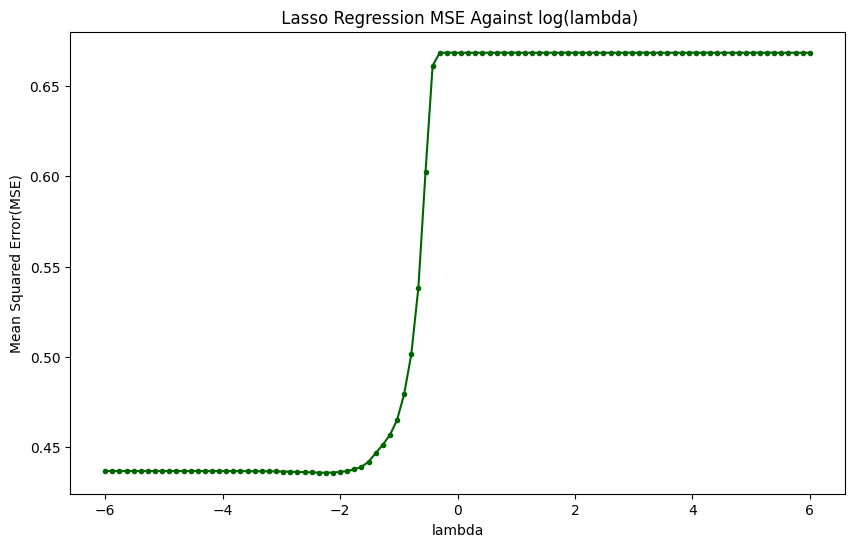

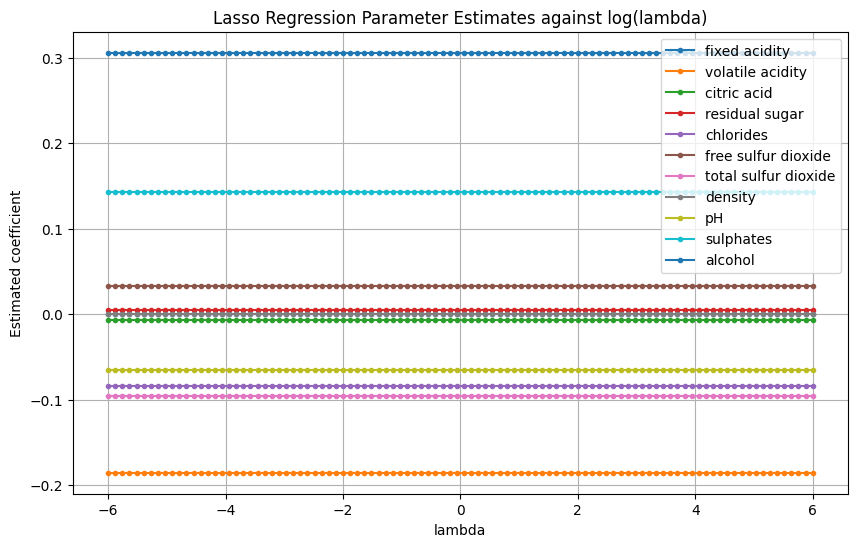

Red WineFeatures selected by Lasso:
-----------------------------------
fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
pH
sulphates
alcohol
Red Wine Features selected by correlation threshold:
--------------------------------------------------
volatile acidity
alcohol


In [13]:
# Scale features
Red_X_scaled = (Red_indep - Red_indep.mean()) / Red_indep.std()

# Lasso regression with cross-validation
lasso = LassoCV(alphas=np.logspace(-6, 6, 100), cv=5)
lasso.fit(Red_X_scaled, Red_dep)

# Plot MSE against lambda
plt.figure(figsize=(10, 6))
mse_path = np.mean(lasso.mse_path_, axis=1)
plt.plot(np.log10(lasso.alphas_), mse_path, marker='.', color = 'darkgreen')
plt.xlabel('lambda')
plt.ylabel('Mean Squared Error(MSE)')
plt.title(' Lasso Regression MSE Against log(lambda)')
plt.show()

# Plot parameter estimates against lambda
plt.figure(figsize=(10, 6))
for i, feature_name in enumerate(Red_indep.columns):
    plt.plot(np.log10(lasso.alphas_), np.repeat(lasso.coef_[i], len(lasso.alphas_)), label=feature_name, marker='.')
plt.xlabel('lambda')
plt.ylabel('Estimated coefficient')
plt.title('Lasso Regression Parameter Estimates against log(lambda)')
plt.legend()
plt.grid()
plt.show()
# Compare with correlation coefficient threshold approach
corr_threshold = 0.3 
corr_coeffs = Red_X_scaled.corrwith(Red_dep.squeeze()).abs()
selected_features_corr = corr_coeffs[corr_coeffs > corr_threshold].index

# Compare selected features
lasso_selected_features = Red_indep.columns[lasso.coef_ != 0]
print('Red WineFeatures selected by Lasso:')
print('-'*35)
for feature in lasso_selected_features:
    print(feature)

print('Red Wine Features selected by correlation threshold:')
print('-'*50)
for feature in selected_features_corr:
    print(feature)
    
    

#### 4.4.a) Use the features identified by LASSO to construct a KNN regression model for red wine

In [14]:
#selected_features_lasso = Red_indep.columns[lasso.coef_ != 0]
X_lasso = Red_X_scaled[lasso_selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lasso, Red_dep, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose the value of k (number of neighbors)
k_value = 5

# Construct the KNN regression model
knn_model = KNeighborsRegressor(n_neighbors=k_value)
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE) on the test set: {mse}')


Mean Squared Error (MSE) on the test set: 0.409375


#### 4.5.a) performance of a linear regression model and the KNN model, measured byMSE and R-squared

In [15]:
model_red = LinearRegression()
model_red.fit(X_train_scaled, y_train)
y_pred = model_red.predict(X_test_scaled)

# Calculate MSE and R2 for Linear Regression
linear_mse = mean_squared_error(y_test, y_pred)
linear_r2 = r2_score(y_test, y_pred)

# KNN Regression Model
knn_model = KNeighborsRegressor(n_neighbors=k_value)
knn_model.fit(X_train_scaled, y_train)
knn_y_pred = knn_model.predict(X_test_scaled)

# Calculate MSE and R2 for KNN Regression
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)

print("Red Wine Linear Regression Performance:")
print('-'*30)
print(f'Mean Squared Error (MSE): {linear_mse}')
print(f'R-squared: {linear_r2}')
print("Red Wine KNN Regression Performance:")
print('-'*30)
print(f'Mean Squared Error (MSE): {knn_mse}')
print(f'R-squared: {knn_r2}')


Red Wine Linear Regression Performance:
------------------------------
Mean Squared Error (MSE): 0.39055762385079584
R-squared: 0.40236553621062043
Red Wine KNN Regression Performance:
------------------------------
Mean Squared Error (MSE): 0.409375
R-squared: 0.3735710336376814


#### 4.3.b)  Use Lasso and cross-validation to provide a plot of MSE against lambda and the parameter estimates versus lambda

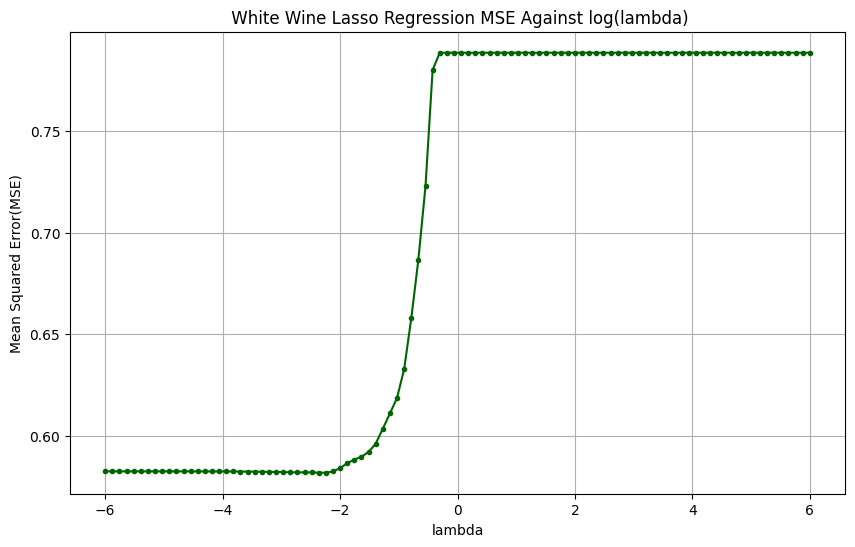

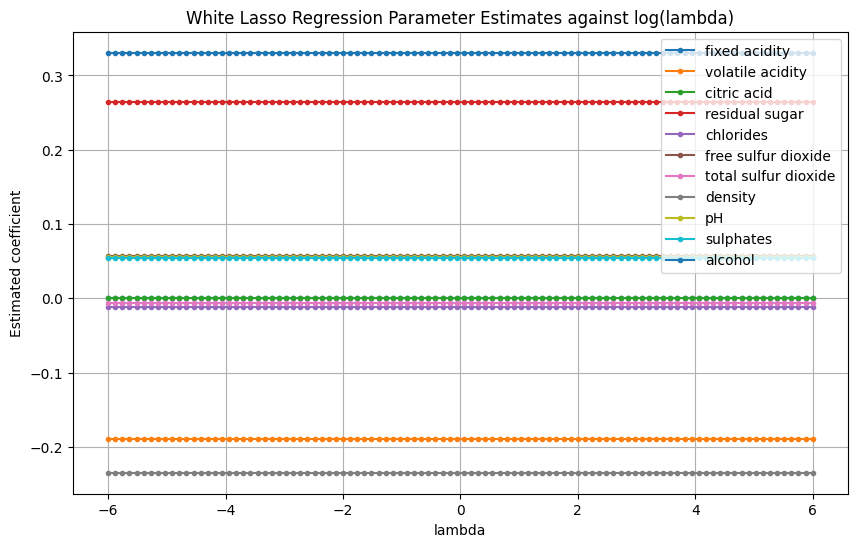

White Features selected by Lasso:
-----------------------------------
volatile acidity
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
White Wine Features selected by correlation threshold:
--------------------------------------------------
density
alcohol


In [16]:
# Scale features
white_scaled = (White_indep - White_indep.mean()) / White_indep.std()

# Lasso regression with cross-validation
lasso = LassoCV(alphas=np.logspace(-6, 6, 100), cv=5)
lasso.fit(white_scaled, White_dep)

# Plot MSE against lambda
plt.figure(figsize=(10, 6))
mse_path = np.mean(lasso.mse_path_, axis=1)
plt.plot(np.log10(lasso.alphas_), mse_path, marker='.', color = 'darkgreen')
plt.xlabel('lambda')
plt.ylabel('Mean Squared Error(MSE)')
plt.title(' White Wine Lasso Regression MSE Against log(lambda)')
plt.grid()
plt.show()

# Plot parameter estimates against lambda
plt.figure(figsize=(10, 6))
for i, feature_name in enumerate(White_indep.columns):
    plt.plot(np.log10(lasso.alphas_), np.repeat(lasso.coef_[i], len(lasso.alphas_)), label=feature_name, marker='.')
plt.xlabel('lambda')
plt.ylabel('Estimated coefficient')
plt.title('White Lasso Regression Parameter Estimates against log(lambda)')
plt.legend()
plt.grid()
plt.show()
# Compare with correlation coefficient threshold approach
threshold = 0.30 
white_corr = white_scaled.corrwith(White_dep.squeeze()).abs()
selected_features_corr = white_corr[white_corr > threshold].index
lasso_selected_features = White_indep.columns[lasso.coef_ != 0]
print('White Features selected by Lasso:')
print('-'*35)
for feature in lasso_selected_features:
    print(feature)

print('White Wine Features selected by correlation threshold:')
print('-'*50)
for feature in selected_features_corr:
    print(feature)


#### 4.4.b) Use the features identified by LASSO to construct a KNN regression model for white wine

In [17]:
X_lasso = white_scaled[lasso_selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lasso, White_dep, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose the value of k (number of neighbors)
k_value = 5

# Construct the KNN regression model
knn_model = KNeighborsRegressor(n_neighbors=k_value)
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
mse_white = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE) on the test set: {mse_white}')


Mean Squared Error (MSE) on the test set: 0.48804081632653057


#### 4.5.b) performance of a linear regression model and the KNN model, measured by MSE and R-squared

In [18]:
model_white = LinearRegression()
model_white.fit(X_train_scaled, y_train)
white_y_pred = model_white.predict(X_test_scaled)

# Calculate MSE and R2 for Linear Regression
linear_mse = mean_squared_error(y_test, white_y_pred)
linear_r2 = r2_score(y_test, white_y_pred)


# KNN Regression Model
knn_model = KNeighborsRegressor(n_neighbors=k_value)
knn_model.fit(X_train_scaled, y_train)
knn_y_pred = knn_model.predict(X_test_scaled)

# Calculate MSE and R2 for KNN Regression
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)

print(f'Mean Squared Error (MSE): {linear_mse}')
print(f'R^2: {linear_r2}')
print(f'Mean Squared Error (MSE): {knn_mse}')
print(f'R^2: {knn_r2}')


Mean Squared Error (MSE): 0.5714404831038473
R^2: 0.26215583678908017
Mean Squared Error (MSE): 0.48804081632653057
R^2: 0.3698415173889896
